# Assessed Problem #2

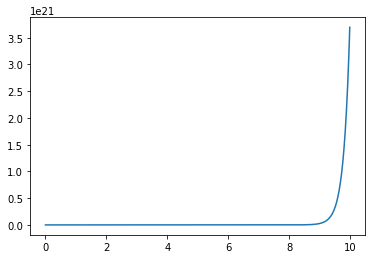

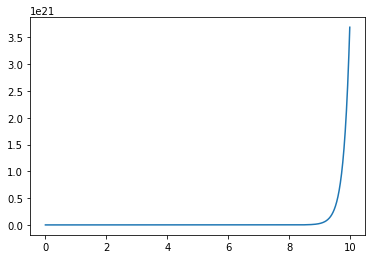

In [41]:
#Libraries
from scipy.integrate import odeint
import numpy as np
from matplotlib.pyplot import *
#

#Constants
a = 5.0
b = 0.9
cs = [8.2, 8.3]

u0 = 0.0
v0 = 1.0
w0 = 2.0
#

#Subroutines
def L(y, t, a, b, c):
    u,v,w = y
    U = -b*w + u*v
    V = -a*(u-v)
    W = c*u-v-u*w
    return U,V,W
#

#Computation
for c in cs:
    x = np.arange(0,10,0.01)
    y = odeint(L,[u0,v0,w0],x, args = (a,b,c))
    plot(x,y[:,2])
    show()  
#